In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
xl = pd.ExcelFile('Data/alldata.xlsx')
xl.sheet_names

['champ1_app',
 'champ1_mentee',
 'champ1_openhouse',
 'champ2_app',
 'champ2_mentee',
 'champ2_openhouse',
 'champ3_app',
 'champ3_mentee',
 'champ3_openhouse']

In [45]:
# Change department name from Thai to English
dep_dict = {
    'สาขาวิศวกรรมหุ่นยนต์และปัญญาประดิษฐ์ (หลักสูตรนานาชาติ)': 'AI',
    'สาขาวิศวกรรมการออกแบบและการผลิตยานยนต์ (หลักสูตรนานาชาติ)': 'ADME',
    'สาขาวิศวกรรมอากาศยาน (หลักสูตรนานาชาติ)': 'AERO',
    'สาขาวิศวกรรมสารสนเทศและการสื่อสาร(หลักสูตรนานาชาติ)': 'ICE',
    'สาขาวิศวกรรมนาโน (หลักสูตรนานาชาติ)': 'NANO',
    'ภาควิชาวิศวกรรมสำรวจ': 'Survey',
    'ภาควิชาวิศวกรรมเหมืองแร่ และปิโตรเลียม': 'Mining and Petroleum',
    'ภาควิชาวิศวกรรมไฟฟ้า': 'Electrical',
    'ภาควิชาวิศวกรรมอุตสาหการ': 'IE',
    'ภาควิชาวิศวกรรมเครื่องกล': 'Mechanical',
    'ภาควิชาวิศวกรรมคอมพิวเตอร์': 'Computer',
    'ภาควิชาวิศวกรรมเคมี': 'Chemical',
    'ภาควิชาวิศวกรรมโยธา': 'Civil',
    'ภาควิชาวิศวกรรมสิ่งแวดล้อม': 'Environmental',
    'ภาควิชาวิศวกรรมโลหการ': 'Metallurgical',
    'ภาควิชาวิศวกรรมนิวเคลียร์': 'Nucleur'
}

In [3]:
dfs = dict()
for sheet in xl.sheet_names:
    dfs[sheet] = xl.parse(sheet_name=sheet)

### Question 1: How many rejected candidates were selected as a mentee for a next year program

In [22]:
rejected_id_1 = [x for x in dfs['champ1_app']['ID']
                 if x not in dfs['champ1_mentee']['ID'] and
                 str(x)[:2] in ['59', '60']]

In [23]:
success_2_from_1 = [x for x in dfs['champ2_mentee']['ID'] if x in rejected_id_1]

<b>Second chance rate</b>: the ratio of candidates who got rejected in ChAMP 1 but got accepted in ChAMP 2 to all ChAMP 1 candidates who got rejected (consider only ChAMP 1 candidates who still have a chance to apply in ChAMP 2).

In [24]:
print('Second chance rate = %.2f' % (len(success_2_from_1) / len(rejected_id_1) * 100))

Second chance rate = 16.00


<b>Old school rate: </b> the ratio of ChAMP 2 mentees who applied and got rejected in ChAMP 1 to all ChAMP 2 mentees.

In [25]:
print('Old school rate = %.2f' % (len(success_2_from_1) * 100 / 72))

Old school rate = 11.11


In [26]:
rejected_id_2 = [x for x in dfs['champ2_app']['ID']
                 if x not in dfs['champ2_mentee']['ID'] and
                 str(x)[:2] in ['59', '60', '61']]
success_3_from_2 = [x for x in dfs['champ3_mentee']['ID'] if x in rejected_id_2]

In [27]:
print('Second chance rate (ChAMP 3) = %.2f' % (len(success_3_from_2) / len(rejected_id_2) * 100))

Second chance rate (ChAMP 3) = 9.09


In [28]:
print('Old school rate = %.2f' % (len(success_3_from_2) * 100 / 73))
# champ 3 has 73 mentees

Old school rate = 28.77


# ChAMP #3 Mentee Analysis

In [109]:
mentee3 = dfs['champ3_mentee']

In [110]:
# Mentee's Department Distribution
count_mentee = mentee3[['ID', 'Department']].groupby('Department').count()
count_mentee.columns = ['Number of Mentee']

# Candidate's Success Rate
count_cand = dfs['champ3_app'][['Department', 'ID']].groupby('Department').count()

In [111]:
count_mentee['Number of Candidates'] = count_cand
count_mentee['Success Rate (%)'] = ((count_mentee['Number of Mentee'] * 100 / count_mentee['Number of Candidates']) * 100 // 1) / 100

In [112]:
mentee3_ratio = count_mentee.sort_values(by = 'Success Rate (%)', ascending = False)
mentee3_ratio.index = mentee3_ratio.index.map(dep_dict)

# ChAMP #2 Mentee Analysis

In [121]:
mentee2 = dfs['champ2_mentee']

# Dep. Dist.
count_mentee = mentee2[['ID', 'Department']].groupby('Department').count()
count_mentee.columns = ['Number of Mentee']

# Success Rate
count_cand = dfs['champ2_app'][['Department', 'ID']].groupby('Department').count()

count_mentee['Number of Candidates'] = count_cand
count_mentee['Success Rate (%)'] = ((count_mentee['Number of Mentee'] * 100 / count_mentee['Number of Candidates']) * 100 // 1) / 100

mentee2_ratio = count_mentee.sort_values(by = 'Success Rate (%)', ascending = False)
mentee2_ratio.index = mentee2_ratio.index.map(dep_dict)

## Stacked Bar Chart using Seaborn

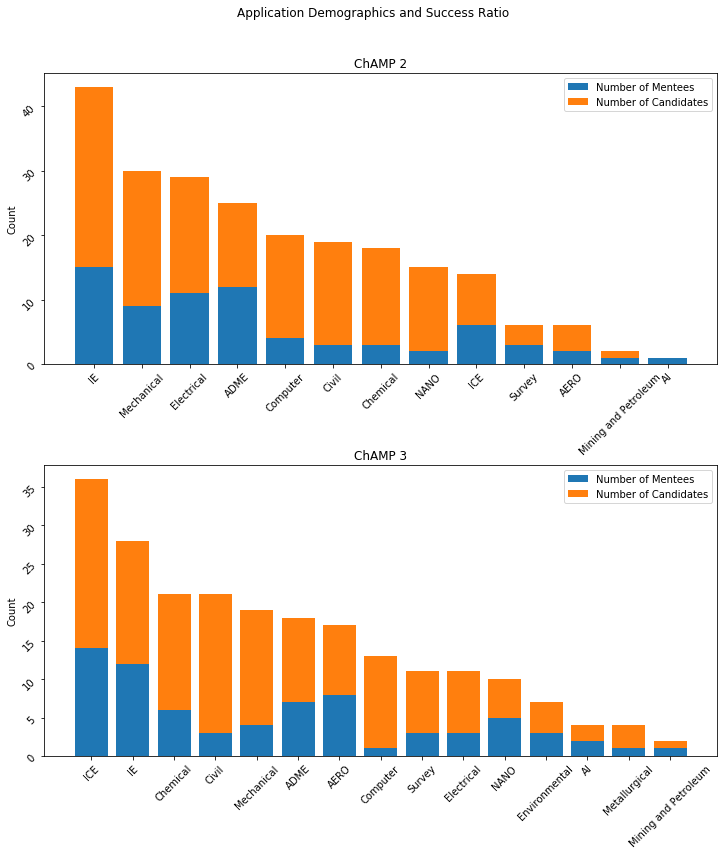

In [141]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (12, 12))
fig.tight_layout(pad = 8.0)
fig.suptitle('Application Demographics and Success Ratio')

mentee2_ratio.sort_values(by = 'Number of Candidates', ascending = False, inplace = True)
mentee3_ratio.sort_values(by = 'Number of Candidates', ascending = False, inplace = True)

mentee2_ratio['diff'] = mentee2_ratio['Number of Candidates'] - mentee2_ratio['Number of Mentee']
mentee3_ratio['diff'] = mentee3_ratio['Number of Candidates'] - mentee3_ratio['Number of Mentee']

ax1.bar(mentee2_ratio.index, mentee2_ratio['Number of Mentee'], label = 'Number of Mentees')
ax1.bar(mentee2_ratio.index, mentee2_ratio['diff'], bottom = mentee2_ratio['Number of Mentee'], label = 'Number of Candidates')
ax1.set_title('ChAMP 2')
ax1.set_ylabel('Count')
ax1.legend()
ax1.tick_params(labelrotation = 45)

ax2.bar(mentee3_ratio.index, mentee3_ratio['Number of Mentee'], label = 'Number of Mentees')
ax2.bar(mentee3_ratio.index, mentee3_ratio['diff'], bottom = mentee3_ratio['Number of Mentee'], label = 'Number of Candidates')
ax2.set_title('ChAMP 3')
ax2.legend()
ax2.set_ylabel('Count')
ax2.tick_params(labelrotation = 45)

In [115]:
mentee3_ratio

,Number of Mentee,Number of Candidates,Success Rate (%),diff
Department,,,,
ICE,14,36,38.88,22
IE,12,28,42.85,16
Chemical,6,21,28.57,15
Civil,3,21,14.28,18
Mechanical,4,19,21.05,15
ADME,7,18,38.88,11
AERO,8,17,47.05,9
Computer,1,13,7.69,12
Survey,3,11,27.27,8
